#  HR Analytics Project


Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


* HR Analytics


Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.


* Attrition in HR


Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.


How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.


* Attrition affecting Companies


A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

# Table of Contents

 Problem Definition
    
   *  Project Overview
   *  Problem Statement


 Dataset Analysis
 
  * Importing Python libraries
  
  * Importing the data
  
  * Data Description and Exploratory Visualisations
  
  * Overview
  
  * Missing Value
  
  * Statistics Value
  
  * Numerical features overview
  
  * Feature distribution by target attribute
  
  * Target Variable: Attrition
  
  * Correlation
  
  * EDA Concluding Remarks
  
  
 Pre-processing Pipeline

   * Encoding
   
   * Feature Scaling
   
   * Splitting data into training and testing sets


Building Machine Learning Models
 
   * Baseline Algorithms
  
   * Ordinary Least Squares regression (OLS)
  
   * Logistic Regression
        Fine-tuning
        Evaluation
    
   * Random Forest Classifier
       Fine-tuning
       Evaluation
   
   * ROC Graphs


conclusion Remarks
 
   * Risk Category
   
   * Strategic Retention Plan


In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('IBM_HR_Employee_Attrition.csv',sep=',',na_values=".")

In [3]:
# first ten row

df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

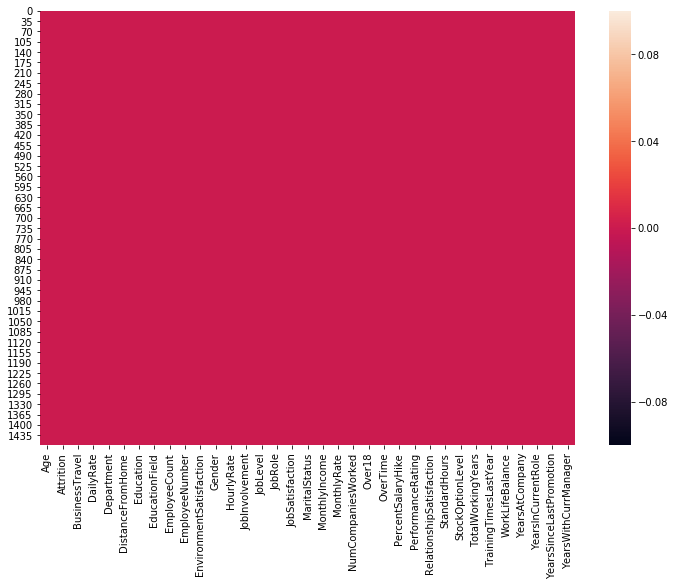

In [8]:
fig=plt.subplots(figsize=(12,8))

sns.heatmap(df.isnull())

The data have several numerical and categorical columns providing various information on employee's personal and employment details.

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Identifying as well as Separating Quantitative and Qualitative data and LabelEncoder



In [11]:
# drop columns which have 1 value onlye

for i in df.columns:
    if df[i].nunique()==1:
        df.drop(i,axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

In [13]:
#  columns which have Cataorical Data set

for i in df.columns:
    if df[i].dtype=='O':
        print(i)
        print(df[i].unique())
        print()

Attrition
['Yes' 'No']

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
['Sales' 'Research & Development' 'Human Resources']

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender
['Female' 'Male']

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus
['Single' 'Married' 'Divorced']

OverTime
['Yes' 'No']



* We can covert categorical data into a suitable data format( integer ) for fitting the ML model. For this, we can use the pandas get_dummies Function. I'll prefer to use LabelEncoder because it does not increase the dimensionality of data but get_dummies do increase the dimensionality of data which may lead to a complex ML model.


* Here I have not used LabelEncoder instead i have written a code that is doing the same as LabelEncoder.

In [14]:
# label encoder of categorical data
for colum in df.columns:
    if df[colum].dtype=='O':
        un = df[colum].unique()
        var=0
        for i in un:
            df[colum].replace(i,var,inplace=True)
            var+=1

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2


In [16]:
# categories categorical data from data frame
# categorical contains the name of column which have name of Qualitative(categorical) data

categorical=['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
     'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','WorkLifeBalance',
     'StockOptionLevel','RelationshipSatisfaction','PerformanceRating']

In [17]:
# categorical data head

categorical_data=df[categorical]
categorical_data.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,WorkLifeBalance,StockOptionLevel,RelationshipSatisfaction,PerformanceRating
0,0,0,0,2,0,2,0,3,2,0,4,0,0,1,0,1,3
1,1,1,1,1,0,3,1,2,2,1,2,1,1,3,1,4,4
2,0,0,1,2,1,4,1,2,1,2,3,0,0,3,0,2,3
3,1,1,1,4,0,4,0,3,1,1,3,1,0,3,0,3,3
4,1,0,1,1,2,1,1,3,1,2,2,1,1,3,1,4,3


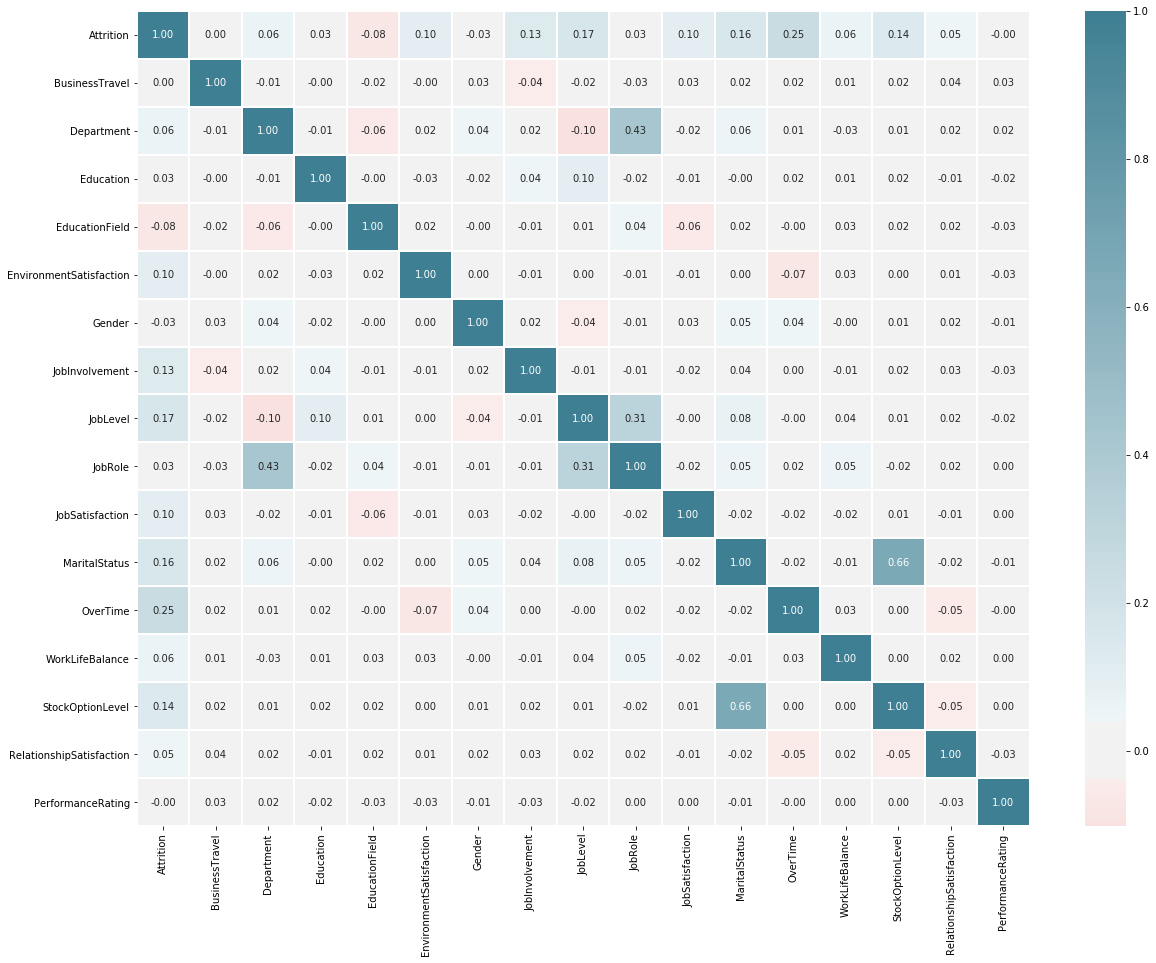

In [18]:
# checking correlation in heatmap of Qualitative Data set

fig_df=(20,15)
fig,ax=plt.subplots(figsize=fig_df)
cmap=sns.diverging_palette(h_neg=15,h_pos=220,as_cmap=True)

sns.heatmap(categorical_data.corr(),center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f',ax=ax);

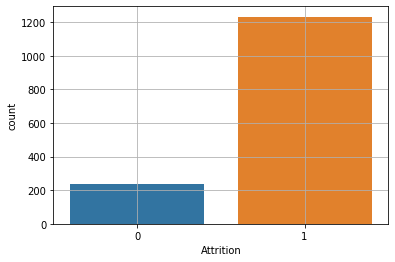

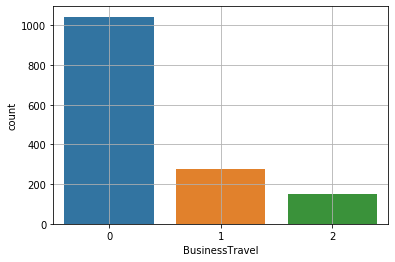

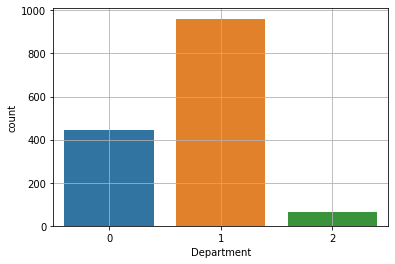

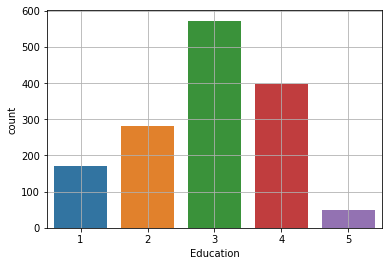

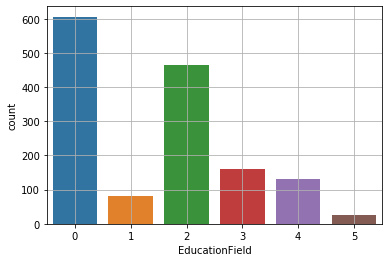

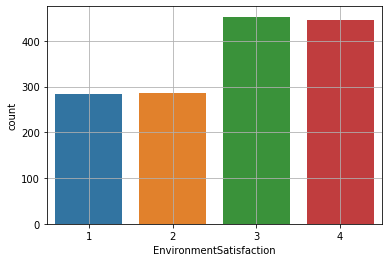

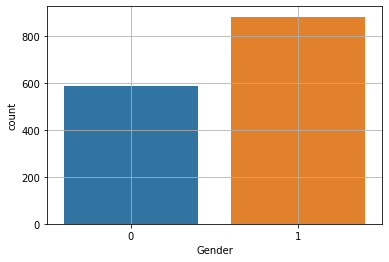

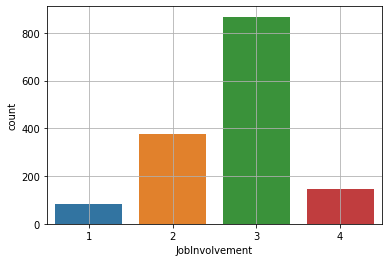

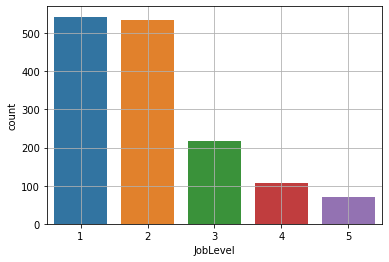

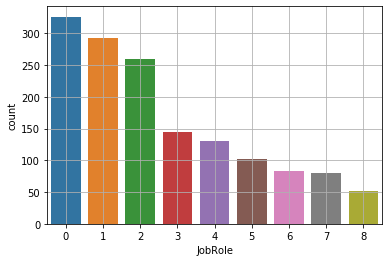

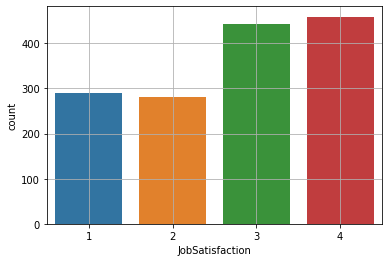

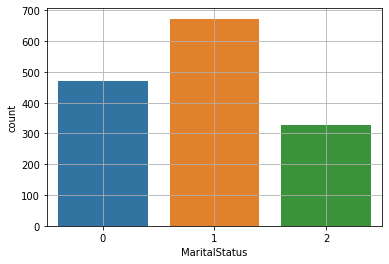

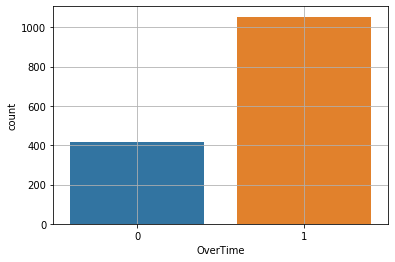

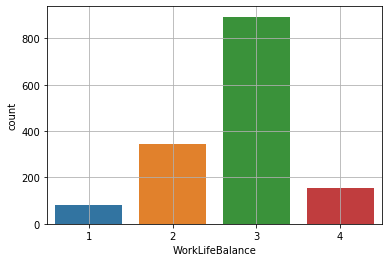

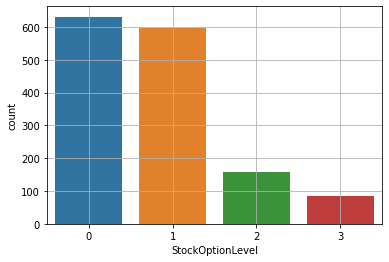

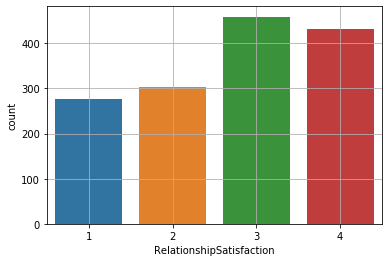

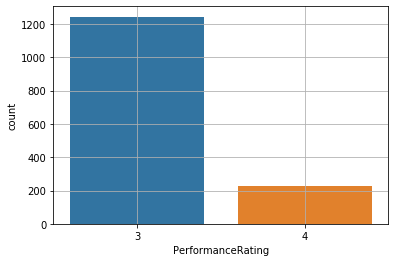

In [19]:
# Ploting countplot for Qualitative Data set

for a in categorical_data.columns:
    sns.countplot(categorical_data[a])
    plt.grid()
    plt.show()

In [20]:
# Preparing Quantitative data

quantitative=df.columns.to_list()
for i in categorical:
    quantitative.remove(i)

In [21]:
quantitative_data=df[quantitative]
quantitative_data.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,5993,19479,8,11,8,0,6,4,0,5
1,49,279,8,2,61,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,2,4,92,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,3,5,56,2909,23159,1,11,8,3,8,7,3,0
4,27,591,2,7,40,3468,16632,9,12,6,3,2,2,2,2


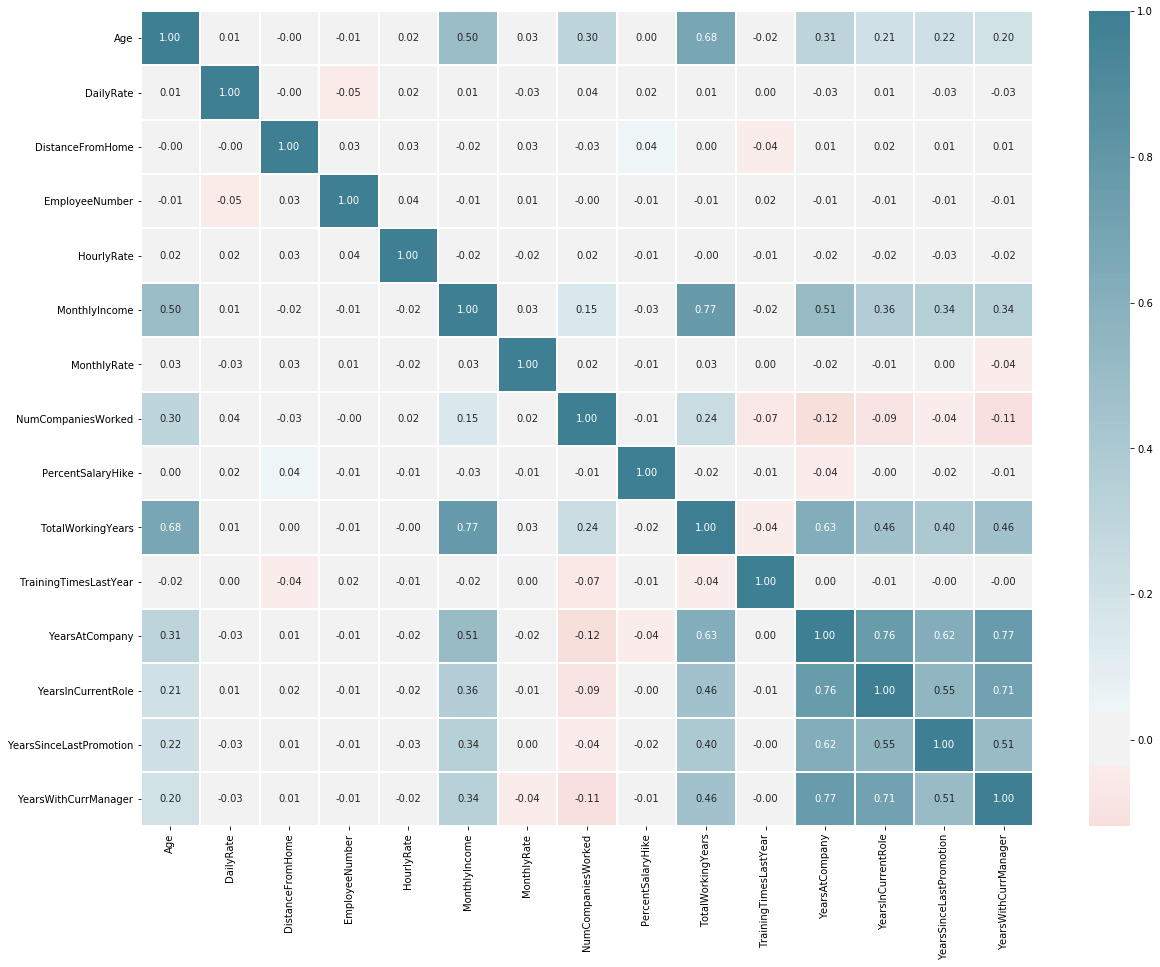

In [22]:
# Heatmap for Quantitative Data For checking of highly correlated columns.


fig_df=(20,15)
fig,ax=plt.subplots(figsize=fig_df)
cmap=sns.diverging_palette(h_neg=15,h_pos=220,as_cmap=True)

sns.heatmap(quantitative_data.corr(),center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f',ax=ax);

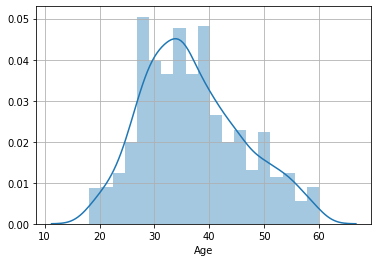

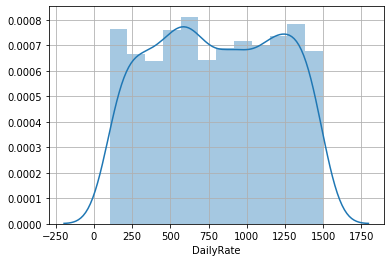

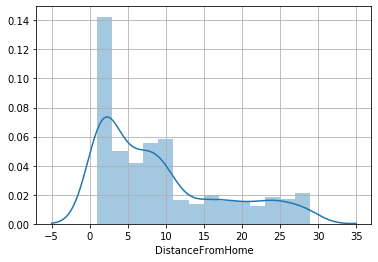

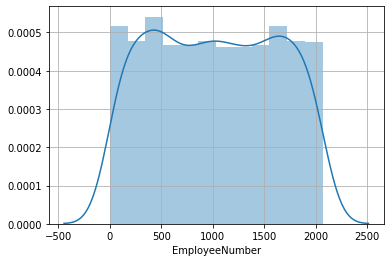

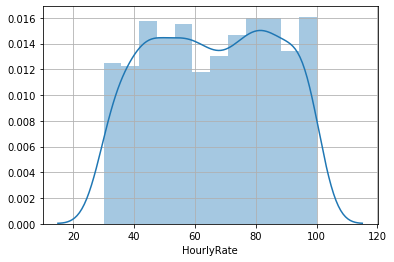

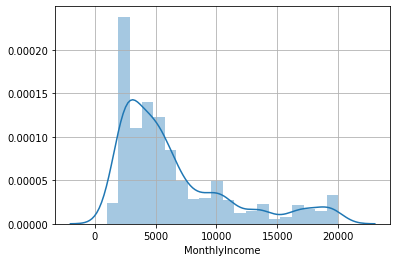

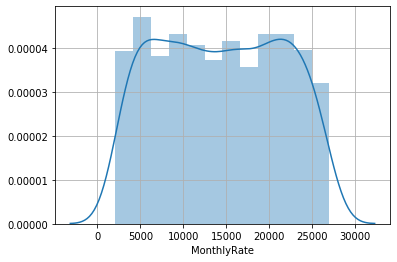

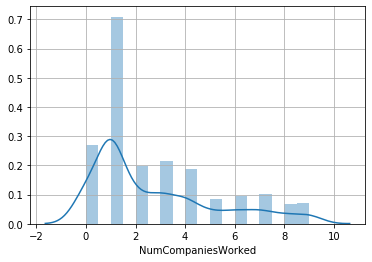

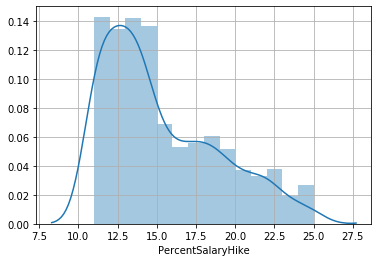

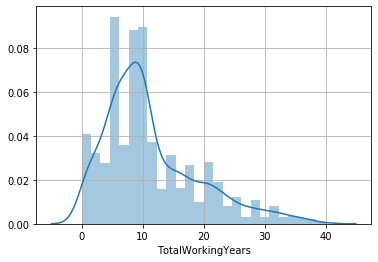

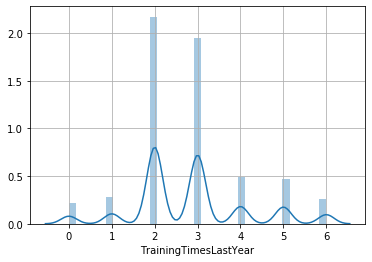

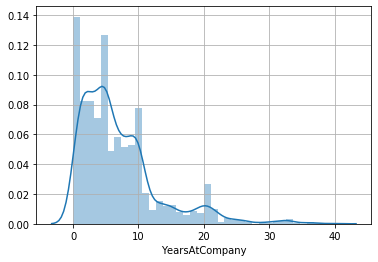

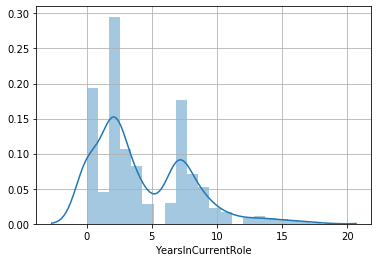

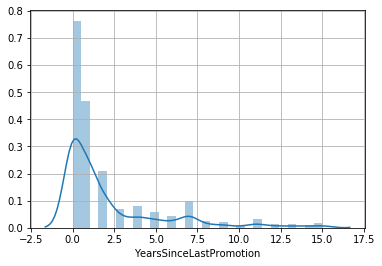

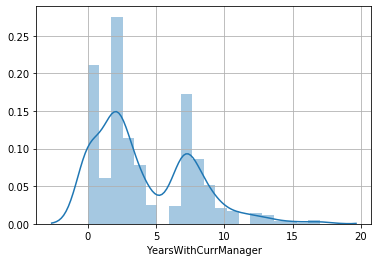

In [23]:
# Ploting distplot for Quantitative Data set

for a in quantitative_data.columns:
    sns.distplot(quantitative_data[a])
    plt.grid()
    plt.show()

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2


# Model Development

Extracting labels from input data frame (df)

In [25]:
# import liabraries:

# ML sklearn model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# stats
import statsmodels.api as sm

# Model Liabraries

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [26]:
y=df['Attrition'] # target
x=df.drop(['Attrition','EmployeeNumber'],axis = 1) # features

y.head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition, dtype: int64

In [27]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,0,1,2,0,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,0,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,0,1373,1,2,2,1,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,0,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,2,1,1,40,...,3,4,1,6,3,3,2,2,2,2


# StandardScaler

With StandardScaler we will be bringing all feature on the same scale


Scalling data always result in better Score

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# standard scaling the data set of quantitative data

# call statndardscaler
ss=StandardScaler()

# fit the data into standardscaler
ss.fit=ss.fit(df.drop(['Attrition','EmployeeNumber'],axis = 1))

# fit standardsclaer data to transfrom features
ss_features=ss.transform(df.drop(['Attrition','EmployeeNumber'],axis = 1))
ss_scaled_features=pd.DataFrame(ss_features,columns=x.columns[0:34])
ss_scaled_features.head(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,-0.590048,0.742527,-1.401512,-1.010909,-0.891688,-1.021863,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0.913194,-1.297775,0.493817,-0.147150,-1.868426,-1.021863,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,-0.590048,1.414363,0.493817,-0.887515,-0.891688,-0.323194,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0.913194,1.461466,0.493817,-0.764121,1.061787,-1.021863,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.590048,-0.524295,0.493817,-0.887515,-1.868426,0.375475,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
5,-0.539166,0.913194,0.502054,0.493817,-0.887515,-0.891688,-1.021863,1.169781,0.816497,0.645041,...,-0.426230,0.266233,-0.932014,-0.421642,-0.620189,-1.077862,-0.001333,0.764998,0.252146,0.526188
6,2.417384,-0.590048,1.292887,0.493817,-0.764121,0.085049,0.375475,0.254625,-1.224745,0.743454,...,2.346151,-1.584178,2.589994,0.092620,0.155707,-1.077862,-0.981014,-1.167687,-0.679146,-1.155935
7,-0.758170,-0.590048,1.377177,0.493817,1.827158,-1.868426,-1.021863,1.169781,0.816497,0.054562,...,2.346151,-0.658973,0.241988,-1.321601,-0.620189,0.338096,-0.981014,-1.167687,-0.679146,-1.155935
8,0.117845,0.913194,-1.453958,0.493817,1.703764,0.085049,-1.021863,1.169781,0.816497,-1.077188,...,2.346151,-0.658973,-0.932014,-0.164511,-0.620189,0.338096,0.325228,0.764998,-0.368715,1.086895
9,-0.101159,-0.590048,1.230910,0.493817,2.197341,0.085049,0.375475,0.254625,0.816497,1.383138,...,-0.426230,-0.658973,1.415991,0.735447,0.155707,-1.077862,-0.001333,0.764998,1.493867,0.806541


# Building Machine Learning Models

Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB.

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [31]:
x_train.shape

(1102, 30)

In [32]:
# building ordinary least squares (OLS)

model=sm.OLS(y_train,x_train)

# model fit into ols

regression=model.fit()

# print ols summary

print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:              Attrition   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              256.0
Date:                Sat, 04 Apr 2020   Prob (F-statistic):                        0.00
Time:                        02:21:14   Log-Likelihood:                         -314.95
No. Observations:                1102   AIC:                                      689.9
Df Residuals:                    1072   BIC:                                      840.0
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

* R-squared (R²): Explains how well the model fits the data with a range of 0 -1, the higher the R² is, the better the model fits the data. (Concerns: If the R² is really close to 1, we may think there is an overfitting issue.)


* F-Statistic: The larger the F-Statistic gets, the better the model performs. Normally we take the number of data points into consideration when we decide how large the F-sats is the proof of the model is good at prediction.


* coef: how many the estimated average of the output variable will change the corresponding variable X changes by a unit.


* t: the t-score in this case, explains how many standard deviations away from the mean with regard to the input variable.


* P > |t|: the p-value, explains how strong the X relats to Y.

In [33]:
# building multiple model

models=[]

models.append(('Logistic Regression',LogisticRegression(solver='liblinear',random_state=10,class_weight='balanced')))

models.append(('Random Forest',RandomForestClassifier(n_estimators=100, random_state=10)))

models.append(('SVM',SVC(gamma='auto',random_state=10)))

models.append(('KNN',KNeighborsClassifier()))

models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=10)))

models.append(('Gaussian NB', GaussianNB()))

In [34]:
# evaluate each model in turn

acc_results=[]
auc_results=[]
names=[]

# set table to table to populate with performance results

col=['Algorithm','ROC AUC Mean','ROC AUC STD','Accuracy Mean','Accuracy STD']
df_results=pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=10)  # 10-fold cross-validation

    cv_acc_results=model_selection.cross_val_score(model,x_train, y_train, cv=kfold, scoring='accuracy') # accuracy scoring

    cv_auc_results=model_selection.cross_val_score(model,x_train, y_train, cv=kfold, scoring='roc_auc') # roc_auc scoring

    acc_results.append(cv_acc_results)
    
    auc_results.append(cv_auc_results)
    
    names.append(name)
    df_results.loc[i]=[name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'],ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,77.39,4.30,72.60,2.49
1,Random Forest,75.96,4.25,86.39,3.61
5,Gaussian NB,75.32,5.09,80.95,3.10
4,Decision Tree Classifier,58.59,3.94,78.50,3.88
3,KNN,57.57,6.25,82.58,4.34
2,SVM,50.00,0.00,84.67,4.01


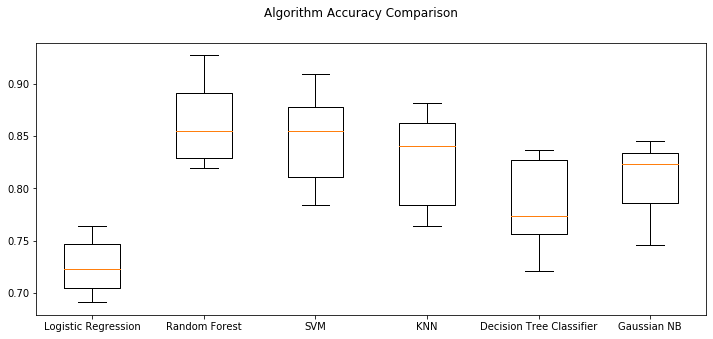

In [35]:
# Visualizing the Model accuracy thru box plot

fig=plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Accuracy Comparison')
ax=fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

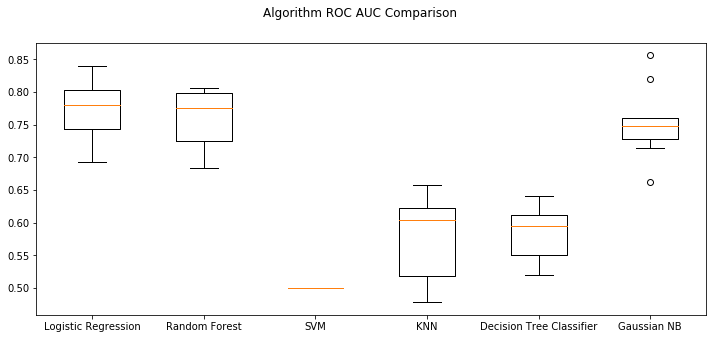

In [36]:
fig=plt.figure(figsize=(12,5))
fig.suptitle('Algorithm ROC AUC Comparison')
ax=fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Area under ROC Curve or AUC for short is a performance metric for binary classification problems.

* The AUC represents a model’s ability to discriminate between positive and negative classes. 

* An area of 1.0 represents a model that made all predictions perfectly. 

* An area of 0.5 represents a model as good as random.

Based on our ROC AUC comparison analysis, highest mean AUC scores We will shortlist in these six algorithms select two algorithms for further analysis.


Logistic Regression & Random Forest are highest mean AUC scores that we will select for further analysis.


    Algorithm	                ROC AUC Mean	ROC AUC STD	 Accuracy Mean	Accuracy STD

    Logistic Regression	            77.39	        4.30	    72.60       	2.49

    Random Forest	                  75.96	        4.25	    86.39	        3.61

    Gaussian NB	                    75.32	        5.09	    80.95	        3.10

    Decision Tree Classifier	       58.59	        3.94	    78.50	        3.88

    KNN	                            57.57	        6.25        82.58    	    4.34

    SVM	                            50.00	        0.00	    84.67	        4.01

# Logistic Regression

In [37]:
# Logistic Regression algorithm will be using 10 fold Cross-Validation to train our Log Reg Model and estimate its AUC score.

kfold=model_selection.KFold(n_splits=10, random_state=10)
modelCV=LogisticRegression(solver='liblinear',class_weight="balanced",random_state=10)
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV,x_train,y_train,cv=kfold,scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.77 (0.04)


In [38]:
# Fine-tuning

param_grid={'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune

log_gs=GridSearchCV(LogisticRegression(solver='liblinear',class_weight="balanced", random_state=7),iid=True,return_train_score=True,
                    param_grid=param_grid,scoring='roc_auc',cv=10)

log_grid=log_gs.fit(x_train,y_train)
log_opt=log_grid.best_estimator_
results=log_gs.cv_results_

print('-'*100)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('-'*100)

----------------------------------------------------------------------------------------------------
best params: LogisticRegression(C=1.9909999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.9909999999999997}
best score: 0.7755711183312025
----------------------------------------------------------------------------------------------------


Accuracy of Logistic Regression Classifier on test set: 77.72


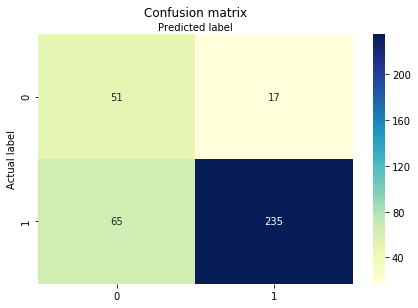

In [39]:
# Confusion Matrix

cnf_matrix=metrics.confusion_matrix(y_test,log_opt.predict(x_test))
class_names=[0,1] # name  of classes
fig, ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(x_test,y_test)*100))

In [40]:
# Classification report for the optimised Log Regression

log_opt.fit(x_train, y_train)
print(classification_report(y_test, log_opt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.44      0.75      0.55        68
           1       0.93      0.78      0.85       300

    accuracy                           0.78       368
   macro avg       0.69      0.77      0.70       368
weighted avg       0.84      0.78      0.80       368



In [41]:
log_opt.fit(x_train, y_train) # fit optimised model to the training data

probs = log_opt.predict_proba(x_test) # predict probabilities

probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving

logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset

print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.861


Instead of getting binary estimated target features (0 or 1), a probability can be associated with the predicted target.


The output provides a first index referr to the probability that the data belong to class 0 (employee not leaving), and the second refers to the probability that the data belong to class 1 (employee leaving).


The resulting AUC score is higher than that best score during the optimisation step. Predicting probabilities of a particular label provides us with a measure of how likely an employee is to leave the company.

# Random Forest Classifier

In [42]:
# Random Forest Classifier algorithm will be using 10 fold Cross-Validation to train our Ran For Cla Model and estimate its AUC score.

# fine tune

rf_classifier=RandomForestClassifier(class_weight = "balanced",random_state=10)

param_grid={'n_estimators':[50, 75, 100, 125, 150, 175],'min_samples_split':[2,4,6,8,10],'min_samples_leaf':[1, 2, 3, 4],'max_depth':[5, 10, 15, 20, 25]}

grid_obj=GridSearchCV(rf_classifier,iid=True,return_train_score=True,param_grid=param_grid,scoring='roc_auc',cv=10)

grid_fit=grid_obj.fit(x_train, y_train)

rf_opt = grid_fit.best_estimator_

print('-'*100)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('-'*100)

----------------------------------------------------------------------------------------------------
best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)
best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
best score: 0.7867305525866019
----------------------------------------------------------------------------------------------------


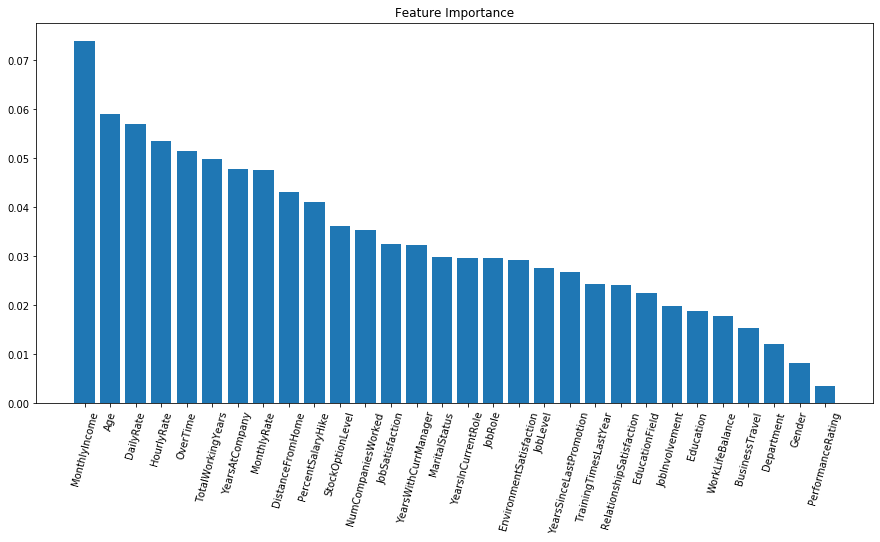

----------------------------------------------------------------------------------------------------
Random Forest helped us identify the Top 10 most important indicators (ranked in the table below)
----------------------------------------------------------------------------------------------------


,Feature,Coefficient
0,MonthlyIncome,0.074012
1,Age,0.058960
2,DailyRate,0.056989
3,HourlyRate,0.053474
4,OverTime,0.051501
5,TotalWorkingYears,0.049800
6,YearsAtCompany,0.047764
7,MonthlyRate,0.047546
8,DistanceFromHome,0.043209
9,PercentSalaryHike,0.041108


In [43]:
importances=rf_opt.feature_importances_
indices=np.argsort(importances)[::-1]  # Sort feature importances in descending order
names=[x_train.columns[i] for i in indices]  # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7))  # Create plot
plt.title("Feature Importance")  # Create plot title
plt.bar(range(x_train.shape[1]), importances[indices])  # Add bars
plt.xticks(range(x_train.shape[1]), names, rotation=75)  # Add feature names as x-axis labels
plt.show()  # Show plot
print('-'*100)


print('Random Forest helped us identify the Top 10 most important indicators (ranked in the table below)')
print('-'*100)
df_param_coeff=pd.DataFrame(columns=['Feature','Coefficient'])
for i in range(30):
    feat=x_train.columns[i]
    coeff=importances[i]
    df_param_coeff.loc[i]=(feat,coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff=df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

Text(0.5, 257.44, 'Predicted label')

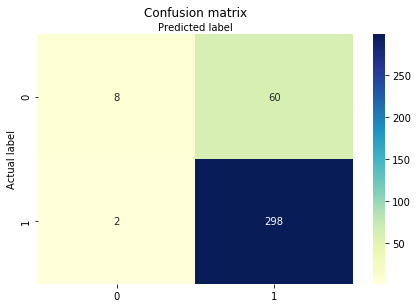

In [44]:
# Confusion Matrix
cnf_matrix=metrics.confusion_matrix(y_test, rf_opt.predict(x_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy of RandomForest Regression Classifier on test set: 83.15
----------------------------------------------------------------------------------------------------
Classification report for the optimised Random Forest Regression
              precision    recall  f1-score   support

           0       0.80      0.12      0.21        68
           1       0.83      0.99      0.91       300

    accuracy                           0.83       368
   macro avg       0.82      0.56      0.56       368
weighted avg       0.83      0.83      0.78       368

----------------------------------------------------------------------------------------------------
fit optimised model to the training dataset
AUC score : 0.836
----------------------------------------------------------------------------------------------------
Confusion Matrix created on heatmap


Text(0.5, 257.44, 'Predicted label')

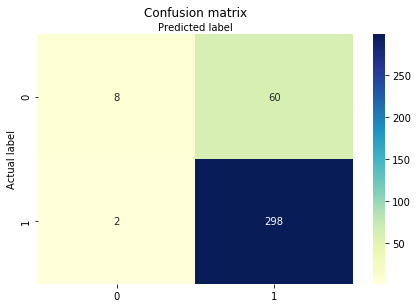

In [45]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(x_test, y_test)*100))
print('-'*100)


# Classification report for the optimised RF Regression
print('Classification report for the optimised Random Forest Regression')
rf_opt.fit(x_train, y_train)
print(classification_report(y_test, rf_opt.predict(x_test)))
print('-'*100)


# fit optimised model to the training data1
rf_opt.fit(x_train, y_train) 
probs=rf_opt.predict_proba(x_test) # predict probabilities
probs=probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('fit optimised model to the training dataset')
print('AUC score : %.3f' % rf_opt_roc_auc)
print('-'*100)


# Confusion Matrix
print('Confusion Matrix created on heatmap')
cnf_matrix=metrics.confusion_matrix(y_test, rf_opt.predict(x_test))
class_names=[0,1] # name  of classes
fig, ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


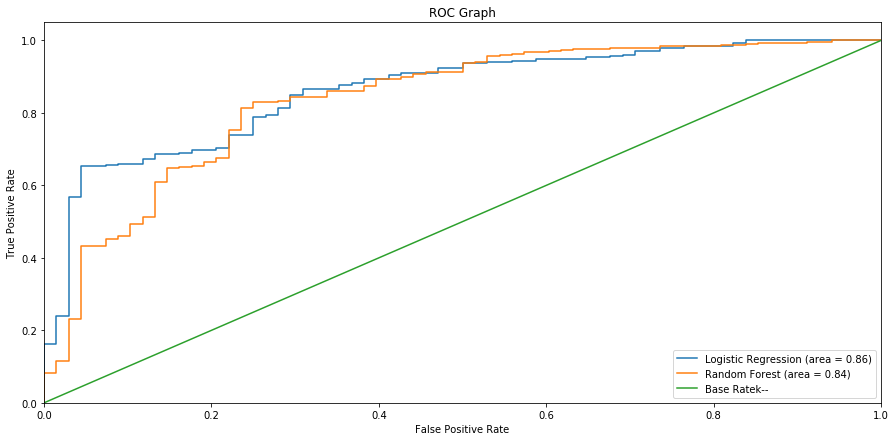

In [46]:
# Create ROC Graph
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(x_test)[:,1])
plt.figure(figsize=(15, 7))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. The green line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


As shown above, the fine-tuned Logistic Regression model showed a higher AUC score compared to the Random Forest Classifier.

# conclusion

Above in statistical model we saw that our model is predict good accuracy as R2 is near to 1, it means model is fit accurately.  OLS Regression model define that how data are fited what is F value & P value of data, how data are skweed.




As compare with our all six algorithms selected two algorithms for further analysis. Logistic Regression & Random Forest Classifier.


This two model

* Logistic Regression 
* Random Forest Classifier

Auc Roc Mean having highest value as compare two all six alogrithms and trained this two model for model accuracy. How machine is learning with train and test data with accuracy.


company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can trained data theoritically with more accuracy and high-risk employees of leaving based on the probability assigned to model



Employees can be assigning a "Risk Category" based on the predicted label & ROC Graph such that asign:

* Low-risk for employees with label < 0.6
* Medium-risk for employees with label between 0.6 and 0.8
* High-risk for employees with label > 0.8




The stronger indicators of people leaving included:

* Monthly Income: people on less wages are more likely to leave the company.

* Over Time: people who works overtime are more likelty to leave the company, they want there own time after work hour.

* Total Working Years: The Less experienced employees are more likely to leave.

* Age: Employees in relatively young age bracket (25-35) are more likely to leave. They want to efort there self more to
  promotion for instance

* Performance Rating: pepole want there rating good for there promotion and incentives. Hence pepole rating goes down they try to swich company with better option.

This is my complet machine learning project hope you can learn from this & if there is any error let me know .

Thanks